In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://blog.nurserylive.com/wp-content/uploads/2017/11/Iris-history-1.jpg")

# Introduction

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width

### Import Dataset

In [2]:
#importing all the required files
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
iris=datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
#checking shape of iris data
df.shape

(150, 4)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#adding a new column that has dependent variable
df['target']=iris.target

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Exploratory Data Analysis 

Lets get Started

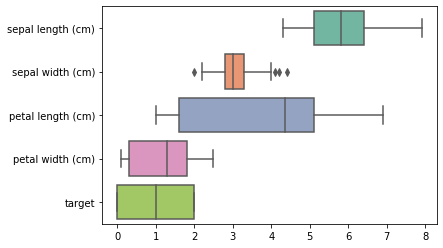

In [10]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

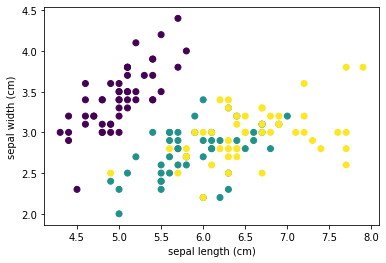

In [11]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"],c=iris.target)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

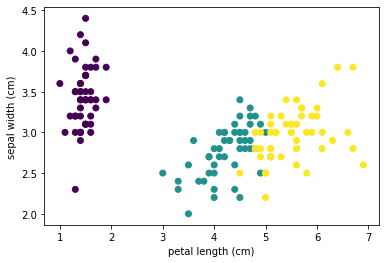

In [12]:
plt.scatter(df["petal length (cm)"],df["sepal width (cm)"],c=iris.target)
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

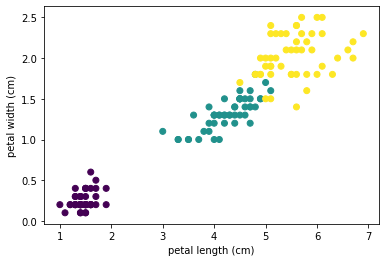

In [13]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c=iris.target)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

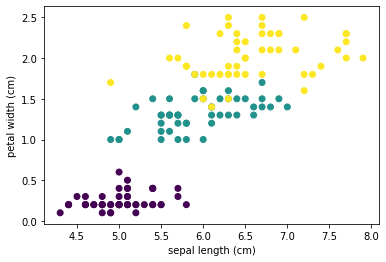

In [14]:
plt.scatter(df["sepal length (cm)"],df["petal width (cm)"],c=iris.target)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

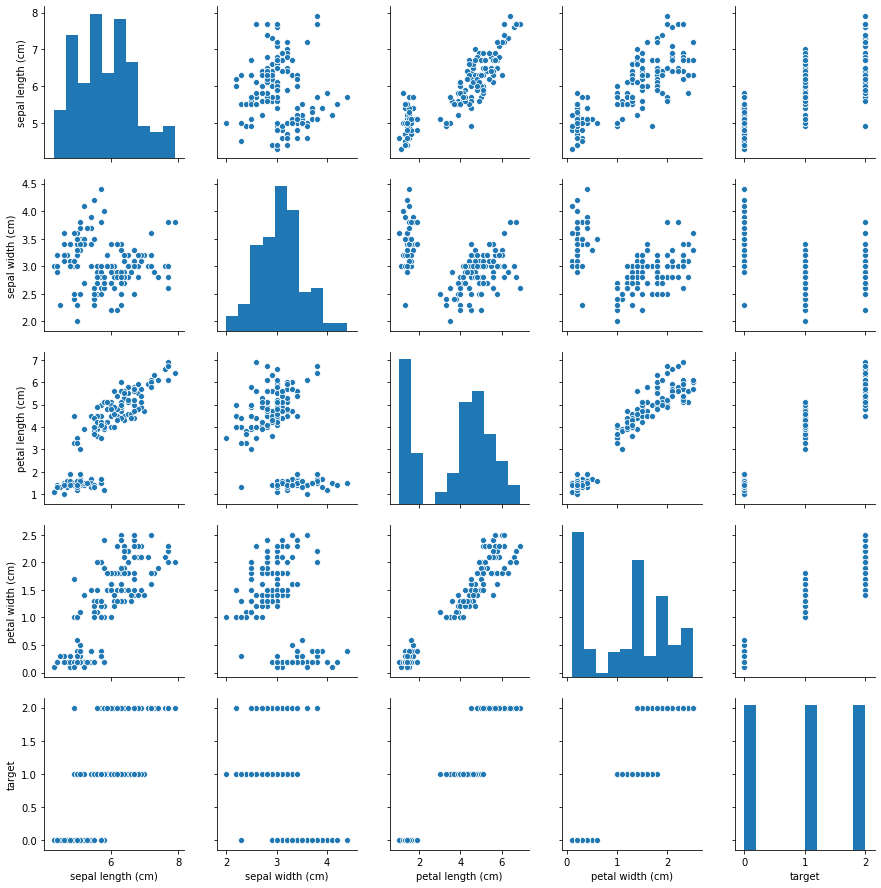

In [15]:
sns.pairplot(df);

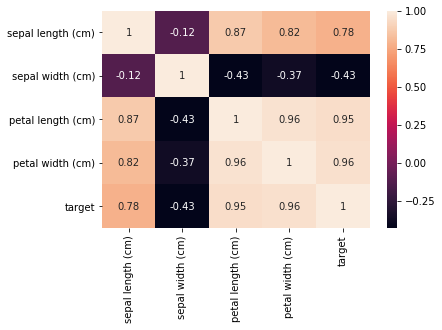

In [16]:
sns.heatmap(df.corr(), annot= True)

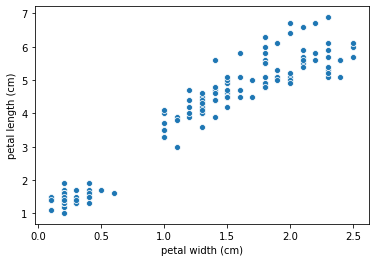

In [17]:
sns.scatterplot(x= 'petal width (cm)', y= 'petal length (cm)', data=df)

In [18]:
import scipy.stats as stats
for i in ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]:
        j,pvalue = stats.normaltest(df[i])
        if(pvalue < 0.05):
#if the value is less then 0.05 then the distribution is not normal and our hypothesis are true.
            print("%s has a pvalue of %f - distribution is not normal"%(i,pvalue))
        else:
            print("%s has pvalue of %f"%(i,pvalue))

sepal length (cm) has pvalue of 0.056824
sepal width (cm) has pvalue of 0.209734
petal length (cm) has a pvalue of 0.000000 - distribution is not normal
petal width (cm) has a pvalue of 0.000000 - distribution is not normal


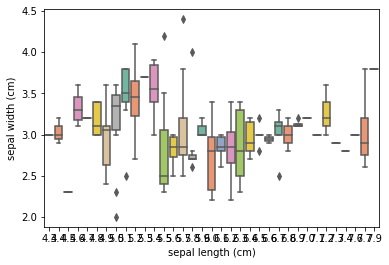

In [19]:
sns.boxplot(x='sepal length (cm)',y='sepal width (cm)',palette= 'Set2',data=df)

In [20]:
#splitting data into train and test dataframe
from sklearn.model_selection import train_test_split
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Decision Tree Classifier using scikit learn

In [21]:
#defining the classifier
dtree = DecisionTreeClassifier()

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



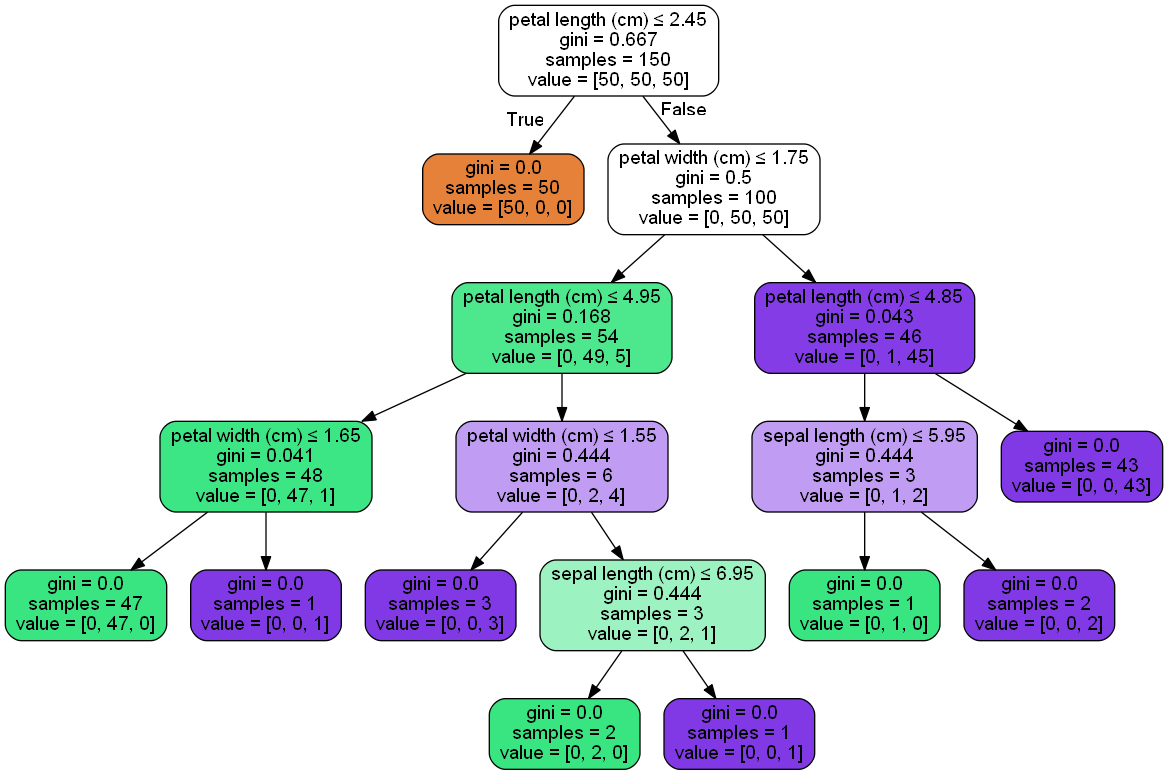

In [26]:
#Visualizing the Decision Tree graphically
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fn = ["sepal length (cm)","petal length (cm)","petal width (cm)"]
clf = DecisionTreeClassifier().fit(df[["sepal length (cm)","petal length (cm)","petal width (cm)"]], y)
dot_data = export_graphviz(clf, out_file=None, feature_names=fn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
image=graph.create_png()
graph.write_png("kmc_dt.png")
Image(filename="kmc_dt.png")